In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
import sys
import re

import scanpy as sc
import pandas as pd

In [3]:
sys.path.append('../src')
from spaceoracle.tools.utils import scale_adata

In [48]:
# # Human Tonsil snRNAseq from SlideTags
# # https://www.nature.com/articles/s41586-023-06837-4

# adata_tmp = sc.read_h5ad('/Volumes/SSD/training_data/snrna_human_tonsil.h5ad')
# adata_tmp.obs = adata_tmp.obs.join(pd.read_csv(
#     '/Users/koush/Projects/SpaceOracle copy/manuscript/human_tonsil_slidetags/tonsil_cell_types.csv', 
#     index_col=0))

# # sc.pp.pca(adata_tmp)
# # sc.pp.neighbors(adata_tmp)

# adata_tmp

adata = sc.read_h5ad('snrna_germinal_center.h5ad')
adata

AnnData object with n_obs × n_vars = 1466 × 3333
    obs: 'cell_type', 'author_cell_type', 'cell_type_int', 'banksy_celltypes', 'cell_type_2', 'cell_type_major'
    uns: 'cell_thresholds', 'cell_type_2_colors', 'cell_type_int_colors', 'received_ligands', 'received_ligands_tfl'
    obsm: 'X_umap', 'spatial', 'spatial_unscaled'
    layers: 'imputed_count', 'normalized_count'

In [49]:
# adata_tmp.obsm['X_umap'] = pd.read_csv(
#     '/Users/koush/Projects/SpaceOracle copy/manuscript/human_tonsil_slidetags/umap.csv', index_col=0).values

In [50]:
# adata_tmp.obs['cell_type_major'] = adata_tmp.obs['cell_type_2'].replace(
#     {
#         'GC Dark Zone': 'Germinal Center B cells', 
#         'GC Light Zone': 'Germinal Center B cells', 
#         'GC Intermediate Zone': 'Germinal Center B cells', 
#         'plasma': 'Plasma cells', 
#         'B_naive': 'B cells', 
#         'B_memory': 'B cells', 
#         'B_germinal_center': 'Germinal Center B cells', 
#         'Naive CD4 T': 'T cells', 
#         'Treg': 'T cells', 
#         'T memory': 'T cells', 
#         'Th1': 'T cells', 
#         'Th2': 'T cells', 
#         'T_CD8': 'T cells', 
#         'T_follicular_helper': 'T cells', 
#         'mDC': 'Dendritic cells', 
#         'FDC': 'Dendritic cells', 
#         'myeloid': 'Myeloid cells', 
#         'NK': 'NK cells', 
#         'pDC': 'Dendritic cells', 
#         'T_double_neg': 'T cells'
#     }
# )

In [51]:
# dfxy = pd.DataFrame(adata_tmp.obsm['spatial'], index=adata_tmp.obs_names)
# dfxy.columns = ['x', 'y']

In [52]:
# adata = adata_tmp[(dfxy.x < 1200) & (dfxy.y < 2000) & (dfxy.y > 1100)]
# adata

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import alphashape

In [54]:
plt.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['figure.dpi'] = 150


ct_points_wt = {}
for ct in adata.obs['cell_type_major'].unique():
    points = np.asarray(
        adata[adata.obs['cell_type_major'] == ct].obsm['spatial'])
    delta = 30
    points = np.vstack(
        (points +[-delta,delta], points +[-delta,-delta], 
        points +[delta,delta], points +[delta,-delta]))
    ct_points_wt[ct] = points

In [84]:
color_dict = {
    "GC Dark Zone": "#f14e13",
    "GC Light Zone": "#0feca9",
    "GC Intermediate Zone": "#33def1",
    "plasma": "#61c17c",
    "B_naive": "#308f0e",
    "B_memory": "#beb637",
    "B_germinal_center": "#8995cf",
    "Naive CD4 T": "#f721b7",
    "Treg": "#ecc91d",
    "T memory": "#49f12f",
    "Th1": "#c43cf2",
    "Th2": "#061bb5",
    "T_CD8": "#dd3652",
    "T_CD4": "#2b07f6",
    "T_follicular_helper": "#e28723",
    "mDC": "#a5a29e",
    "FDC": "#a5a29e",
    "myeloid": "#a5a29e",
    "NK": "#a5a29e",
    "pDC": "#a5a29e",
    "T_double_neg": "#a5a29e",
    "Germinal Center B cells": "#6295cd",
    "Plasma cells": "#58a862",
    "T cells": "#cc5343",
    "B cells": "#9865c8",
    "Dendritic cells": "#9da13c",
    "Myeloid cells": "#f3c009",
    "NK cells": "#a36e29",
}

In [67]:
%matplotlib inline

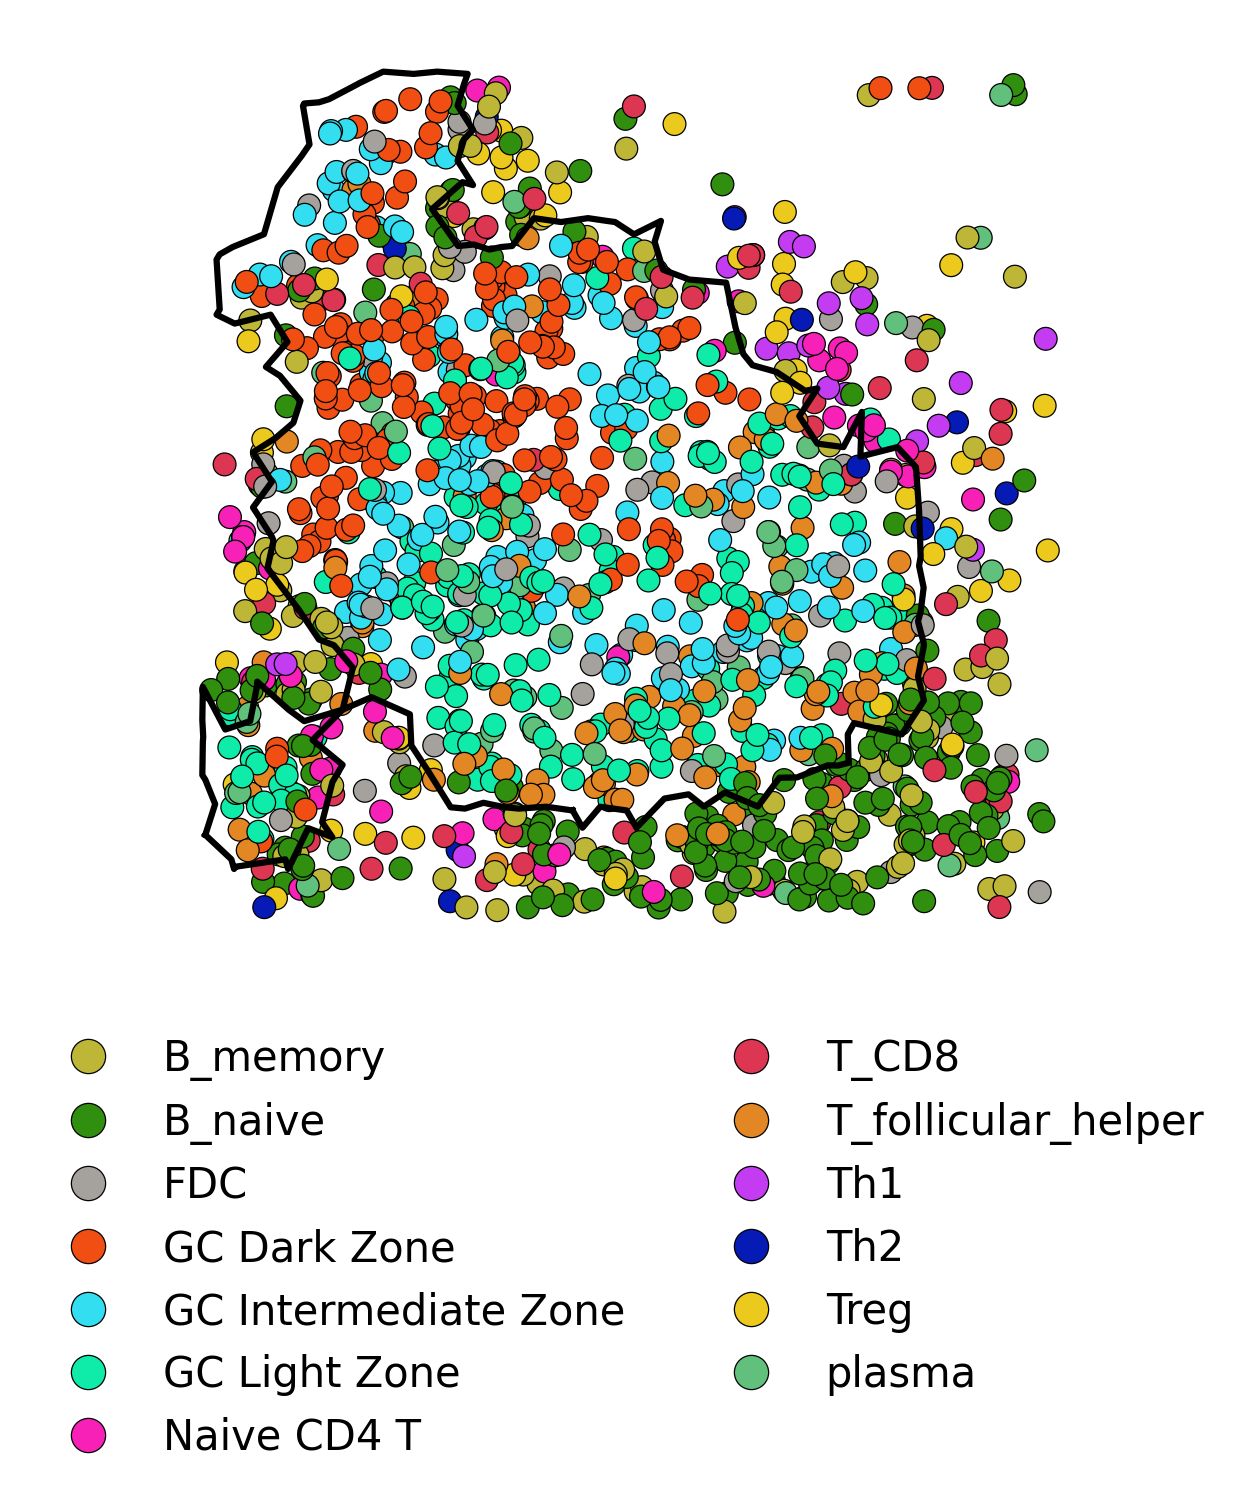

In [85]:
adata = adata[adata.obs['cell_type_2'].isin(
        [
            'B_naive', 'B_memory',
            'GC Light Zone', 'GC Dark Zone', 'GC Intermediate Zone',
            'T_follicular_helper', 'FDC', 'plasma', 'T_CD8', 'Treg',
            'Naive CD4 T', 'Th1', 'Th2'
        ]
    )
]

annot = 'cell_type_2'

# adatax = adata

sns.scatterplot(data=adata.obs, 
    x=adata.obsm['spatial'][:,0], 
    y=adata.obsm['spatial'][:,1],
    s=30,
    hue=annot,
    linewidth=0.3,
    edgecolor='black',
    legend='brief', 
    palette=color_dict
)

plt.axis('off')

alpha_shape = alphashape.alphashape(
    ct_points_wt['Germinal Center B cells'], alpha=0.035)
for geom in alpha_shape.geoms:
    if geom.area > 10000:
        plt.plot(
            geom.exterior.xy[0], 
            geom.exterior.xy[1], 
            color='black', alpha=1
        )

plt.legend(
    bbox_to_anchor=(0.5, -0.05), 
    loc='upper center', 
    ncol=2, 
    frameon=False, 
    markerscale=1.5, 
    fontsize=10
)

# handles, labels = plt.gca().get_legend_handles_labels()
# new_labels = [rename[l].replace('\n', ' ') if l in rename else l for l in labels]
# plt.gca().legend(handles, new_labels, bbox_to_anchor=(0.5, -0.05), 
#     loc='upper center', ncol=2, frameon=False, 
#     markerscale=2, fontsize=10)

plt.show()

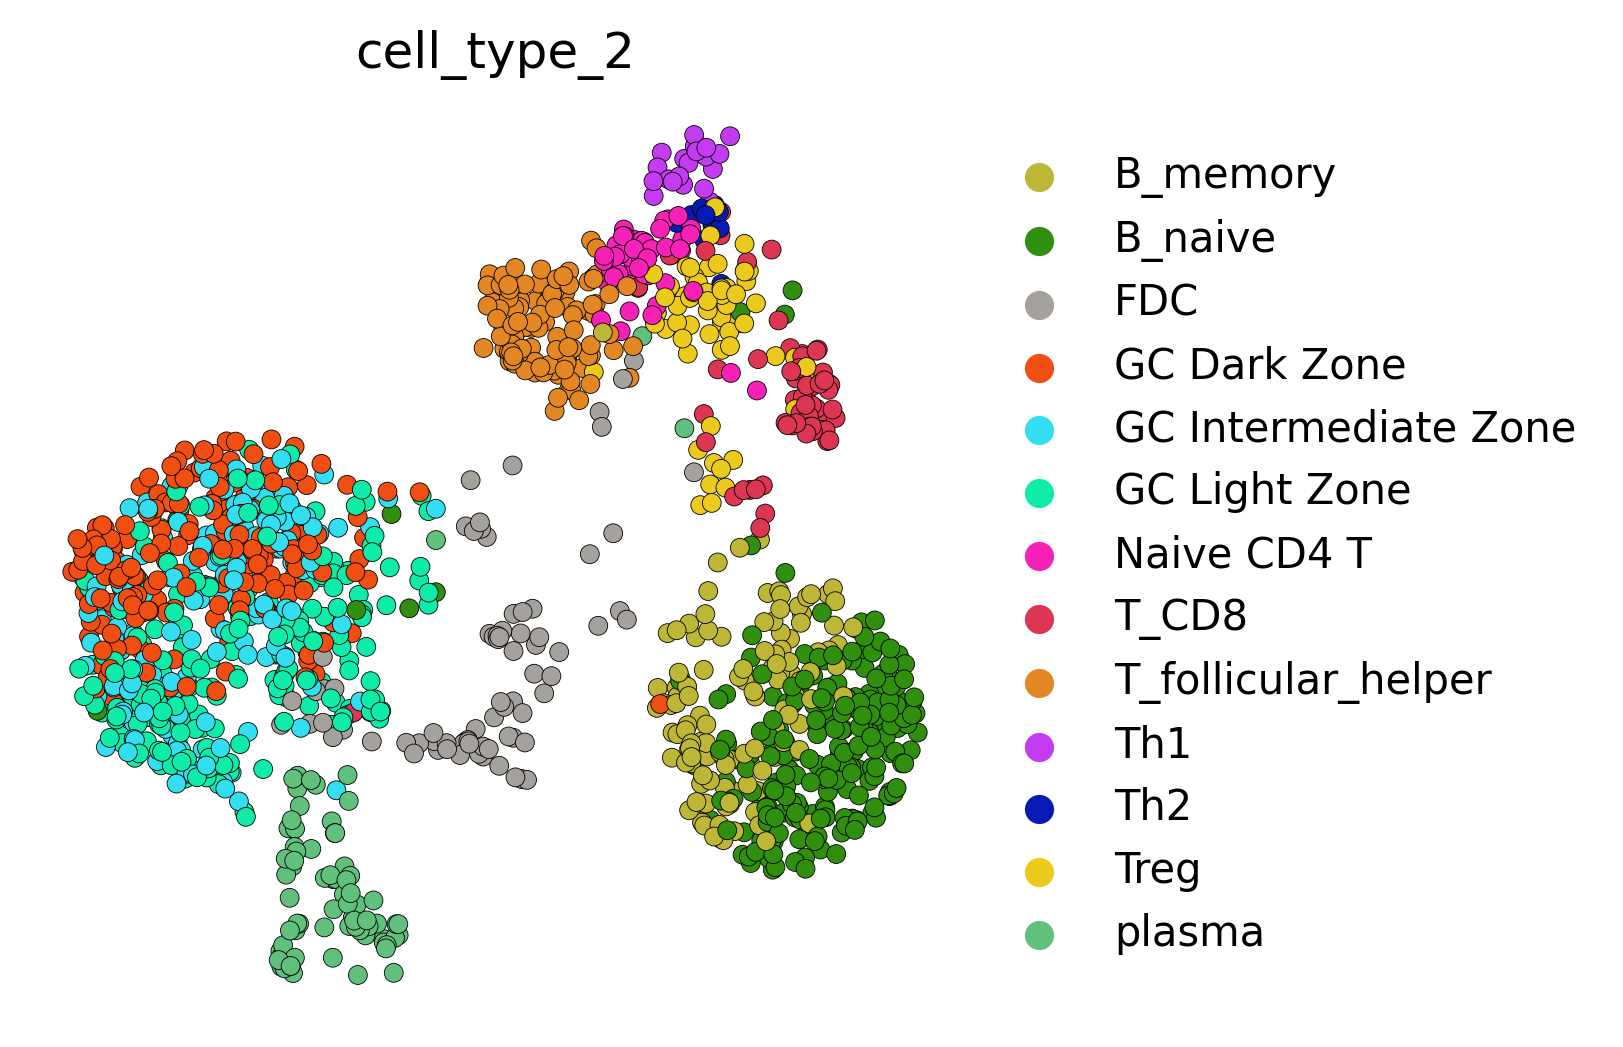

In [88]:
sc.pl.umap(adata, color='cell_type_2', 
    frameon=False, palette=color_dict, 
    edgecolor='black', linewidth=0.2)

In [58]:
adata.layers["raw_count"] = np.exp(adata.X) - 1

In [59]:
adata.X.max()

8.61589797952331

In [81]:
import os
import shutil

In [83]:
for i in adata.var_names:
    if os.path.exists(f'/Volumes/SSD/lasso_runs/human_tonsil/{i}.orphan'):
        shutil.copy(
            f'/Volumes/SSD/lasso_runs/human_tonsil/{i}.orphan', 
            '/tmp/tonsil_betadatas')
    else:
        pd.read_parquet(
            f'/Volumes/SSD/lasso_runs/human_tonsil/{i}_betadata.parquet').loc[
                adata.obs_names].astype(np.float16).to_parquet(
            f'/tmp/tonsil_betadatas/{i}_betadata.parquet')
    # break

In [32]:
from spaceoracle.SpaceTravLR import SpaceShip

In [37]:
ss = SpaceShip(adata)

In [38]:
ss.run_celloracle()

Loading prebuilt promoter base-GRN. Version: hg19_gimmemotifsv5_fpr2


 12%|█▎        | 1/8 [02:16<15:52, 136.06s/it]


KeyboardInterrupt: 